In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'

query = '''select t.type, t.operation, t.amount as t_amount, t.balance, t.k_symbol, l.amount as l_amount, l.duration, l.payments, l.status
from trans t
right join loan l
on t.account_id = l.account_id;'''


In [9]:
data = pd.read_sql_query(query,connection_string)
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,1100.0,1100.0,,96396,12,8033.0,B
1,PRIJEM,VKLAD,9900.0,11000.0,,96396,12,8033.0,B
2,PRIJEM,VKLAD,700.0,700.0,,165960,36,4610.0,A
3,PRIJEM,,2.9,702.9,UROK,165960,36,4610.0,A
4,PRIJEM,VKLAD,18972.0,19674.9,,165960,36,4610.0,A


In [6]:
data_table = pd.read_sql_table('district',connection_string)
data_table.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [7]:
data_wrapper = pd.read_sql('district',connection_string)
data_wrapper.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [8]:
data_wrapper = pd.read_sql(query,connection_string)
data_wrapper.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,1100.0,1100.0,,96396,12,8033.0,B
1,PRIJEM,VKLAD,9900.0,11000.0,,96396,12,8033.0,B
2,PRIJEM,VKLAD,700.0,700.0,,165960,36,4610.0,A
3,PRIJEM,,2.9,702.9,UROK,165960,36,4610.0,A
4,PRIJEM,VKLAD,18972.0,19674.9,,165960,36,4610.0,A


In [18]:
data['type'].value_counts()

VYDAJ     91428
PRIJEM    59306
VYBER      5347
Name: type, dtype: int64

In [21]:
data['type'].isna().unique()

array([False])

In [24]:
data['operation'].unique()

array(['VKLAD', '', 'VYBER', 'PREVOD Z UCTU', 'PREVOD NA UCET',
       'VYBER KARTOU'], dtype=object)

In [28]:
data[['type','operation']]

,type,operation
0,PRIJEM,VKLAD
1,PRIJEM,VKLAD
2,PRIJEM,VKLAD
3,PRIJEM,
4,PRIJEM,VKLAD
...,...,...
156076,PRIJEM,
156077,VYDAJ,VYBER
156078,VYDAJ,PREVOD NA UCET
156079,VYDAJ,VYBER KARTOU


In [44]:
# number of different loans:
(pd.crosstab(data['operation'],data['type']) > 0).sum().sum()

7

In [45]:
# count for each combination:
pd.crosstab(data['operation'],data['type'])

type,PRIJEM,VYBER,VYDAJ
operation,,,
,31337,0,0
PREVOD NA UCET,0,0,25796
PREVOD Z UCTU,5336,0,0
VKLAD,22633,0,0
VYBER,0,5347,64842
VYBER KARTOU,0,0,790


In [48]:
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,1100.0,1100.0,,96396,12,8033.0,B
1,PRIJEM,VKLAD,9900.0,11000.0,,96396,12,8033.0,B
2,PRIJEM,VKLAD,700.0,700.0,,165960,36,4610.0,A
3,PRIJEM,,2.9,702.9,UROK,165960,36,4610.0,A
4,PRIJEM,VKLAD,18972.0,19674.9,,165960,36,4610.0,A


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\kegel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


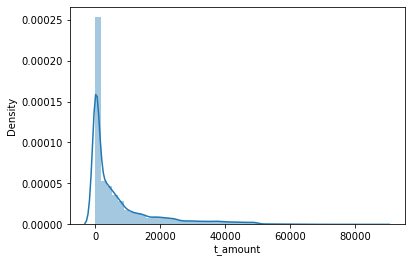

In [50]:
sns.distplot(data['t_amount'])
plt.show()

C:\Users\kegel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


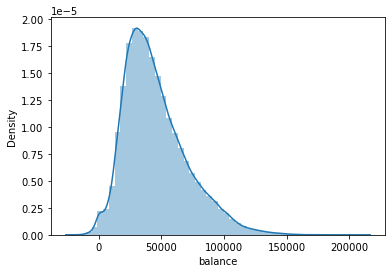

In [51]:
sns.distplot(data['balance'])
plt.show()

In [52]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

In [55]:
data['t_amount_log'] = list(map(log_transfom_clean,data['t_amount']))

<ipython-input-52-ea972cef7338>:2: RuntimeWarning: divide by zero encountered in log
  x = np.log(x)


C:\Users\kegel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


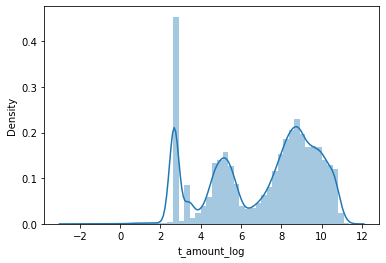

In [56]:
sns.distplot(data['t_amount_log'])
plt.show()

In [57]:
data['balance_log'] = list(map(log_transfom_clean,data['balance']))

<ipython-input-52-ea972cef7338>:2: RuntimeWarning: invalid value encountered in log
  x = np.log(x)


C:\Users\kegel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


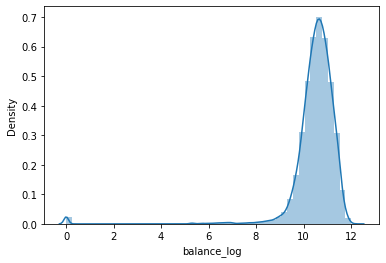

In [58]:
sns.distplot(data['balance_log'])
plt.show()